## Three Takeaways

1. The drugs with the highest efficacy were also the drugs with the hightest number of measurements per regimen (Capomulin and Ramicane) which could indicate that more measurements need to be taken of the other drugs before a true comparison could be made.

2. In fact there appears to be a direct correlation between the number of measurements per regimen and overall efficacy when looking at Capomulin, Ramicane, Infubinol and Ceftamin (the drugs with the highest measurements per regimen).

3. Regarding the Capomulin regimen there appears to be a correlation between weight and tumor volume. The higher the weight, the larger the tumor volume

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df = pd.DataFrame(merged_df)
# Display the data table for preview

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [206]:
# Checking the number of mice.

number_of_mice = merged_df["Mouse ID"].nunique()
print(number_of_mice)

249


In [207]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = merged_df[merged_df.duplicated()]

duplicate_mouse = pd.DataFrame(duplicate_mouse["Mouse ID"])

duplicate_mouse

,Mouse ID
909,g989


In [208]:
#checking to see how many instances of dupes there are = 5

dupe_mouse_df = merged_df.set_index("Mouse ID")

dupe_mouse_df.loc["g989", "Timepoint"]

Mouse ID
g989     0
g989     0
g989     5
g989     5
g989    10
g989    10
g989    15
g989    15
g989    20
g989    20
g989    25
g989    30
g989    35
Name: Timepoint, dtype: int64

In [209]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mouse_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [210]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Can see the row count has now dropped from 1893 to 1888 (5 values dropped)

merged_df_duplicates = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

clean_merged_df = pd.DataFrame(merged_df_duplicates)

clean_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [211]:
# Checking the number of mice in the clean DataFrame.

number_of_mice = clean_merged_df["Mouse ID"].nunique()
print(number_of_mice)

249


## Summary Statistics

In [212]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_mean = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

regimen_median = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

regimen_var = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

regimen_std = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

regimen_sem = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_summary = pd.DataFrame({"Mean (Tumor Volume (mm3))": regimen_mean,
                               "Median (Tumor Volume (mm3))": regimen_median,
                               "Variance (Tumor Volume (mm3))": regimen_var,
                               "Standard Deviation (Tumor Volume (mm3))": regimen_std,
                               "SEM (Tumor Volume (mm3))": regimen_sem})

regimen_summary

,Mean (Tumor Volume (mm3)),Median (Tumor Volume (mm3)),Variance (Tumor Volume (mm3)),Standard Deviation (Tumor Volume (mm3)),SEM (Tumor Volume (mm3))
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

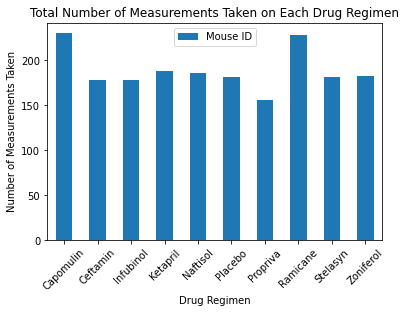

In [260]:
# Generate a bar plot showing the total number of measurements taken on each drug 
# regimen using pandas.

plot_pandas = clean_merged_df.groupby(["Drug Regimen"])["Mouse ID"].count()
plot_pandas_df = pd.DataFrame(plot_pandas)

#plot_data_1 = clean_merged_df["Drug Regimen"].unique()
#plot_data_2 = clean_merged_df["Drug Regimen"].value_counts()

#plt.bar(plot_data_1, plot_data_2)

plot_pandas_df.plot.bar()
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.show()

In [263]:
# Generate a bar plot showing the total number of measurements 
#taken on each drug regimen using pyplot.

py_measurement = clean_merged_df["Drug Regimen"].value_counts().tolist()
each_regimen = clean_merged_df["Drug Regimen"].unique().tolist()

py_measurement

[230, 228, 188, 186, 182, 181, 181, 178, 178, 156]

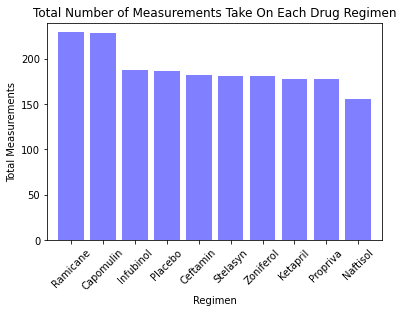

In [264]:
x_axis = np.arange(len(py_measurement))
plt.bar(x_axis, py_measurement, alpha=0.5, color='b')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, each_regimen, rotation=45)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(py_measurement)+10)

# Give the chart a title, x label, and y label
plt.title("Total Number of Measurements Take On Each Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Total Measurements")

plt.show()

Text(0.5, 1.0, 'Percentage of Mice by Sex')

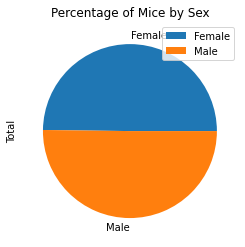

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_distribution = clean_merged_df.groupby(["Mouse ID", "Sex"])
gender_dist_df = pd.DataFrame(gender_distribution.size())

gender_mice = pd.DataFrame(gender_dist_df.groupby(["Sex"]).count())

gender_mice.columns = ["Total"]

gender_mice["Perentage of Mice by Sex"] = (gender_mice["Total"]/number_of_mice) * 100

plot = gender_mice.plot.pie(y="Total")

plt.title("Percentage of Mice by Sex")

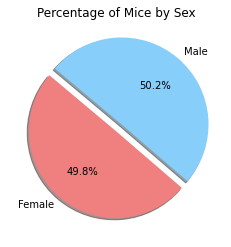

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = clean_merged_df.groupby("Sex")["Mouse ID"].nunique()
gender_distribution

female_percent = (gender_distribution[0] / number_of_mice) * 100
male_percent = (gender_distribution[1] / number_of_mice) * 100


# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [female_percent, male_percent]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Percentage of Mice by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [218]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

capomulin = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Capomulin", :]
ramicane = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Ramicane", :]
infubinol = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Infubinol", :]
ceftamin = clean_merged_df.loc[clean_merged_df["Drug Regimen"] == "Ceftamin", :]

capomulin_max = capomulin.groupby("Mouse ID")["Timepoint"].max()
ramicane_max = ramicane.groupby("Mouse ID")["Timepoint"].max()
infubinol_max = infubinol.groupby("Mouse ID")["Timepoint"].max()
ceftamin_max = ceftamin.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_tumor_vol = pd.DataFrame(capomulin_max)
ramicane_tumor_vol = pd.DataFrame(ramicane_max)
infubinol_tumor_vol = pd.DataFrame(infubinol_max)
ceftamin_tumor_vol = pd.DataFrame(ceftamin_max)

capomulin_merge = pd.merge(clean_merged_df, capomulin_tumor_vol, on=("Mouse ID", "Timepoint"))
ramicane_merge = pd.merge(clean_merged_df, ramicane_tumor_vol, on=("Mouse ID", "Timepoint"))
infubinol_merge = pd.merge(clean_merged_df, infubinol_tumor_vol, on=("Mouse ID", "Timepoint"))
ceftamin_merge = pd.merge(clean_merged_df, ceftamin_tumor_vol, on=("Mouse ID", "Timepoint"))

capomulin_merge.head()
#ramicane_merge.head()
#infubinol_merge.head()
#ceftamin_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


In [219]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# CAPOMULIN

capo_tumor = capomulin_merge["Tumor Volume (mm3)"]
quartiles = capo_tumor.quantile([.25, .5, .75])

low_q = quartiles.min()
upper_q = quartiles.max()
iqr = upper_q - low_q

print(f"The lower quartile of Tumor Volume for Capomulin: {low_q}")
print(f"The upper quartile of Tumor Volume for Capomulin: {upper_q}")
print(f"The interquartile range of Tumor Volume for Capomulin: {iqr}")
    

    # Determine outliers using upper and lower bounds
    
lower_bounds = low_q - (1.5 * iqr)
upper_bounds = upper_q + (1.5 * iqr)

print(f"Anything lower than {lower_bounds} could be considered an outlier")
print(f"Anything higher than {upper_bounds} could be considered an outlier")

The lower quartile of Tumor Volume for Capomulin: 32.37735684
The upper quartile of Tumor Volume for Capomulin: 40.1592203
The interquartile range of Tumor Volume for Capomulin: 7.781863460000004
Anything lower than 20.70456164999999 could be considered an outlier
Anything higher than 51.83201549 could be considered an outlier


In [220]:
#RAMICANE 

ram_tumor = ramicane_merge["Tumor Volume (mm3)"]
quartiles = ram_tumor.quantile([.25, .5, .75])

low_q = quartiles.min()
upper_q = quartiles.max()
iqr = upper_q - low_q

print(f"The lower quartile of Tumor Volume for Ramicane: {low_q}")
print(f"The upper quartile of Tumor Volume for Ramicane: {upper_q}")
print(f"The interquartile range of Tumor Volume for Ramicane: {iqr}")
    

    # Determine outliers using upper and lower bounds
    
lower_bounds = low_q - (1.5 * iqr)
upper_bounds = upper_q + (1.5 * iqr)

print(f"Anything lower than {lower_bounds} could be considered an outlier")
print(f"Anything higher than {upper_bounds} could be considered an outlier")

The lower quartile of Tumor Volume for Ramicane: 31.56046955
The upper quartile of Tumor Volume for Ramicane: 40.65900627
The interquartile range of Tumor Volume for Ramicane: 9.098536719999998
Anything lower than 17.912664470000003 could be considered an outlier
Anything higher than 54.30681135 could be considered an outlier


In [221]:
#INFUBINOL

infub_tumor = infubinol_merge["Tumor Volume (mm3)"]
quartiles = infub_tumor.quantile([.25, .5, .75])

low_q = quartiles.min()
upper_q = quartiles.max()
iqr = upper_q - low_q

print(f"The lower quartile of Tumor Volume for Infubinol: {low_q}")
print(f"The upper quartile of Tumor Volume for Infubinol: {upper_q}")
print(f"The interquartile range of Tumor Volume for Infubinol: {iqr}")
    

    # Determine outliers using upper and lower bounds
    
lower_bounds = low_q - (1.5 * iqr)
upper_bounds = upper_q + (1.5 * iqr)

print(f"Anything lower than {lower_bounds} could be considered an outlier")
print(f"Anything higher than {upper_bounds} could be considered an outlier")

The lower quartile of Tumor Volume for Infubinol: 54.04860769
The upper quartile of Tumor Volume for Infubinol: 65.52574285
The interquartile range of Tumor Volume for Infubinol: 11.477135160000003
Anything lower than 36.83290494999999 could be considered an outlier
Anything higher than 82.74144559000001 could be considered an outlier


In [222]:
#CEFTAMIN

ceft_tumor = ceftamin_merge["Tumor Volume (mm3)"]
quartiles = ceft_tumor.quantile([.25, .5, .75])

low_q = quartiles.min()
upper_q = quartiles.max()
iqr = upper_q - low_q

print(f"The lower quartile of Tumor Volume for Ceftamin: {low_q}")
print(f"The upper quartile of Tumor Volume for Ceftamin: {upper_q}")
print(f"The interquartile range of Tumor Volume for Ceftamin: {iqr}")
    

    # Determine outliers using upper and lower bounds
    
lower_bounds = low_q - (1.5 * iqr)
upper_bounds = upper_q + (1.5 * iqr)

print(f"Anything lower than {lower_bounds} could be considered an outlier")
print(f"Anything higher than {upper_bounds} could be considered an outlier")

The lower quartile of Tumor Volume for Ceftamin: 48.72207785
The upper quartile of Tumor Volume for Ceftamin: 64.29983003
The interquartile range of Tumor Volume for Ceftamin: 15.577752179999997
Anything lower than 25.355449580000002 could be considered an outlier
Anything higher than 87.66645829999999 could be considered an outlier


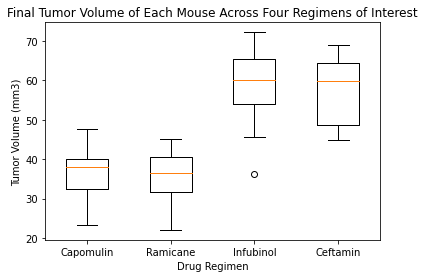

In [223]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot_tumor_vol = [capo_tumor, ram_tumor, infub_tumor, ceft_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot_tumor_vol, labels = treatment_list, widths=0.5)
plt.show()

## Line and Scatter Plots

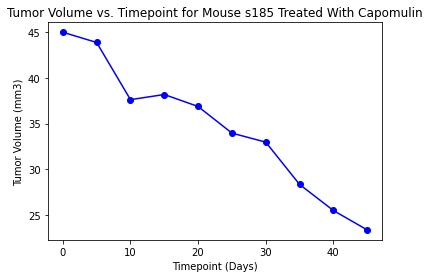

In [224]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

    #Gather Data on s185
s_1 = capomulin.loc[capomulin["Mouse ID"] == "s185",:]

x_axis = s_1["Timepoint"]
y_axis = s_1["Tumor Volume (mm3)"]



plt.title("Tumor Volume vs. Timepoint for Mouse s185 Treated With Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, marker="o", color="blue")
plt.show()

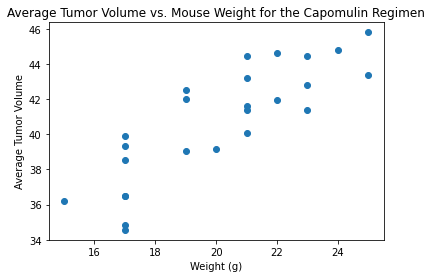

In [225]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#x_axis = capomulin.loc[capomulin["Weight (g)"]]
#y_axis = capomulin.groupby(["Mouse ID"]).mean()

average_capo = capomulin.groupby(["Mouse ID"]).mean()

plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.scatter(average_capo["Weight (g)"], average_capo["Tumor Volume (mm3)"])

## Correlation and Regression

In [226]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(average_capo["Weight (g)"], average_capo["Tumor Volume (mm3)"])[0]
correlation = round(correlation, 2)

print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [233]:
x_values = average_capo["Weight (g)"]
y_values = average_capo["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

print(f"slope: {slope}")
print(f"intercept: {intercept}")
print(f"rvalue: {rvalue}")
print(f"pvalue: {pvalue}")
print(f"stderr: {stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope: 0.9544396890241045
intercept: 21.552160532685015
rvalue: 0.8419363424694718
pvalue: 1.3225722434712642e-07
stderr: 0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


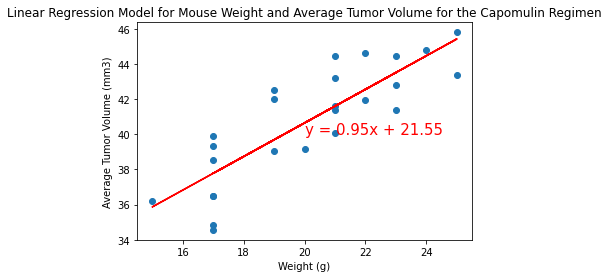

In [255]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20, 40), fontsize=15,color="red")
plt.title("Linear Regression Model for Mouse Weight and Average Tumor Volume for the Capomulin Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()